##### Importing the necessary modules

* librosa: To manage and extract features from the audio files.
* os: To list all the files from the directories.
* numpy: To manage the numeric arrays.
* pyplot from matplotlib: To plot different data on the graph.
* soundfile: To open and write the audio files.
* pandas: To create and manage DataFrames.

In [1]:
import librosa
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import soundfile
import pandas as pd
print(librosa.__version__)
dir(librosa.display)
print(matplotlib.__version__)

0.10.2
3.7.1


* Load the /audio/sample_data.wav file using librosa.
* Calculate the correlation of the audio file using the librosa module.
* Plot the correlation using matplotlib.


[Text(0.5, 1.0, 'Auto-correlation'),
 Text(0.5, 0, 'Lag (frames)'),
 Text(0, 0.5, 'Correlation')]

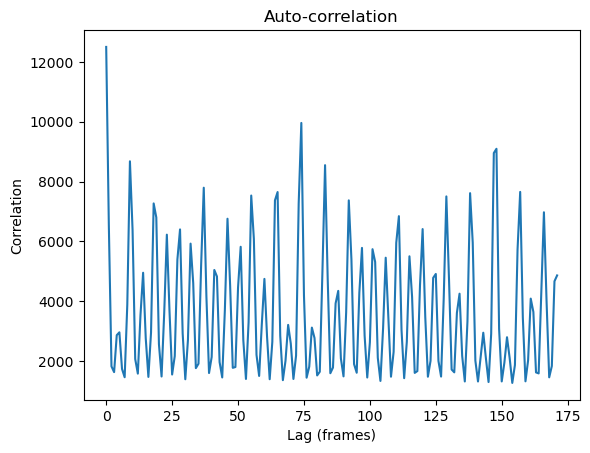

In [2]:
y, sr = librosa.load('../audio/example.wav')
onset_strength = librosa.onset.onset_strength(y=y, sr=sr, hop_length=512)
correlation = librosa.autocorrelate(onset_strength, max_size=4 * sr // 512)
fig, ax = plt.subplots()
ax.plot(correlation)
ax.set(title='Auto-correlation', xlabel='Lag (frames)', ylabel = 'Correlation')

##### The following waveforms of the audio were plotted using the display module available in librosa:

* Monophonic view of the audio file.
* Harmonic view of the audio file.
* Percussive view of the audio file.

The following steps were performed:

* Two subplots were created using matplotlib, so that I could plot multiple waveforms in a single graph.
* The librosa.display method was used to plot the monophonic view of the audio file.
* The librosa.display method was used to plot the harmonic and percussive values of the audio file.

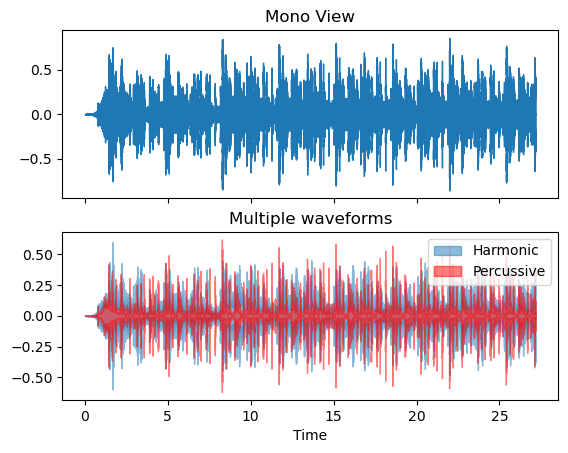

In [3]:
# Apply harmonic-percussive source separation
y_harm, y_perc = librosa.effects.hpss(y)

# Create subplots
fig, ax = plt.subplots(nrows=2, sharex=True)

# Display the waveform of the original audio
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Mono View')
ax[0].label_outer()

# Display the waveforms of the harmonic and percussive components
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[1], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[1], label='Percussive')
ax[1].set(title='Multiple waveforms')
ax[1].legend()


#### My Reasoning: Since machine learning modules work with numeric values, but data in this project is of audio files, it is required to convert the audio files to numeric values. To convert the audio files into numeric values, I need to extract the features from an audio file.

### Extracting features from the audio file.

#### My Task Breakdown Approach:

* Create a new method that accepts an audio file and opens it using the soundfile module.
* Get the mel frequency cepstral coefficients (mfcc) of the audio file using the librosa. This small set of features describes the overall shape of the spectral envelope.
* Get the chroma feature of the audio file. This feature describes the pitch of the audio file.
* Get the spectral scale of pitches of the audio file.
* Create a new NumPy list and add all of these features to that list and return it.

In [4]:
import numpy as np
import librosa
import soundfile

def extract_feature(file_name):
    try:
        with soundfile.SoundFile(file_name) as sound_file:
            file = sound_file.read(dtype="float32")
            print("Original data shape:", file.shape)
            
            if file.ndim == 2:  # Check if stereo and convert to mono
                file = librosa.to_mono(file.T)
                print("Converted to mono. New data shape:", file.shape)
            
            sample_rate = sound_file.samplerate
            print("Sample rate:", sample_rate)
            
            # Calculate MFCC
            mfcc = librosa.feature.mfcc(y=file, sr=sample_rate, n_mfcc=40)
            mel_frequency = np.mean(mfcc.T, axis=0)
            result = np.hstack((mel_frequency))
            
            # Calculate Chroma
            chroma = librosa.feature.chroma_stft(y=file, sr=sample_rate)
            chroma_mean = np.mean(chroma.T, axis=0)
            result = np.hstack((result, chroma_mean))
            
            # Calculate Spectral Scale
            spectral_scale = librosa.feature.melspectrogram(y=file, sr=sample_rate)
            spectral_scale_mean = np.mean(spectral_scale.T, axis=0)
            result = np.hstack((result, spectral_scale_mean))
            
            return result
    except Exception as e:
        print("An error occurred:", e)
        return None

feature_vector = extract_feature('../audio/example.wav')
print("Extracted feature vector:", feature_vector)


Original data shape: (870191, 2)
Converted to mono. New data shape: (870191,)
Sample rate: 32000
Extracted feature vector: [-2.12290985e+02  1.10028122e+02  2.89514275e+01  4.26283951e+01
  1.84157143e+01  6.65443707e+00  1.11963902e+01  1.39393406e+01
  6.98561335e+00  4.05779123e+00 -6.00170279e+00 -5.74053526e-01
  7.76258469e-01  4.50453281e+00 -1.17774229e+01  2.44949961e+00
  2.74480987e+00 -8.87850821e-01 -5.38038731e+00  3.44142175e+00
 -3.03354597e+00  6.15223981e-02 -1.07443821e+00  2.50313330e+00
  3.50845098e+00  1.48923743e+00 -3.04806560e-01  1.63872564e+00
 -6.47562504e+00 -2.95931554e+00 -7.92008400e-01  8.82701039e-01
 -1.43446639e-01 -2.21023887e-01 -2.87494993e+00  7.97476545e-02
 -4.33070153e-01  3.00146013e-01 -1.99644375e+00 -9.50221717e-01
  3.82045150e-01  3.61636102e-01  3.99053842e-01  4.60678339e-01
  4.19396877e-01  5.53831697e-01  4.47550923e-01  4.17543292e-01
  5.01404285e-01  6.25039399e-01  7.46403575e-01  4.96122986e-01
  1.60124245e+01  5.28047829e+01

##### Create a new dictionary with the labels of the audio files. Each audio file is named an XX-XX-XX-XX-XX-XX-XX.wav file, where each X represents a number, and the third section of the name contains the code which represents the emotion in the training data set. These codes are as follows:

* 01: This represents the neutral emotion.
* 02: This represents the calm emotion.
* 03: This represents the happy emotion.
* 07: This represents the disgust emotion.

In [5]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '07': 'disgust',
}
observed_emotions = ['neutral', 'calm', 'happy', 'disgust']

#### Create a new method that will load the audio files and convert them into a dataset of their features and their labels.
#####  My Task Breakdown Approach:
* Create a new method that accepts the BasePath of the directory where audio files are.
* Use the os module to get all files from the directory.
* Use the extract_feature() method to get the features of the audio file.
* Use the file’s name to split the name and get the label by dictionary.
* Return the data and labels of all files from this method.


In [6]:
def load_data(BasePath):
    data, labels = [], []
    for root, dirc, files in os.walk(BasePath):
        for file in files:
            found = True
            if file[-3:] == 'wav':
                file = os.path.join(root, file)
                emotionValue = file.split("-")[2]
                if int(emotionValue) < 4 or int(emotionValue) == 7:
                    emotion = emotions[file.split("-")[2]]
                    if emotion not in observed_emotions:
                        found = False
                    if found:
                        feature = extract_feature(file)
                        data.append(feature)
                        labels.append(emotion)
    return np.array(data), labels

data, labels = load_data("../Data")
print("Shape of data: ", data.shape)
print("Number of labels: ", len(labels))

Original data shape: (60327,)
Sample rate: 16000
Original data shape: (56590,)
Sample rate: 16000
Original data shape: (63530,)
Sample rate: 16000
Original data shape: (51785,)
Sample rate: 16000
Original data shape: (58192,)
Sample rate: 16000
Original data shape: (62463,)
Sample rate: 16000
Original data shape: (61929,)
Sample rate: 16000
Original data shape: (60861,)
Sample rate: 16000
Original data shape: (64598,)
Sample rate: 16000
Original data shape: (61929,)
Sample rate: 16000
Original data shape: (56056,)
Sample rate: 16000
Original data shape: (64598,)
Sample rate: 16000
Original data shape: (59793,)
Sample rate: 16000
Original data shape: (52853,)
Sample rate: 16000
Original data shape: (62996,)
Sample rate: 16000
Original data shape: (62462,)
Sample rate: 16000
Original data shape: (57124,)
Sample rate: 16000
Original data shape: (52319,)
Sample rate: 16000
Original data shape: (60861,)
Sample rate: 16000
Original data shape: (56056,)
Sample rate: 16000
Original data shape:

##### Create a classifier to classify the data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

##### Split the training and testing data

In [8]:
training_x, testing_x, training_y, testing_y = train_test_split(data, labels, test_size=0.05, random_state=5)

##### Plot the labels of the testing dataset to see the number of emotions available in the testing dataset

<Axes: xlabel='Emotions'>

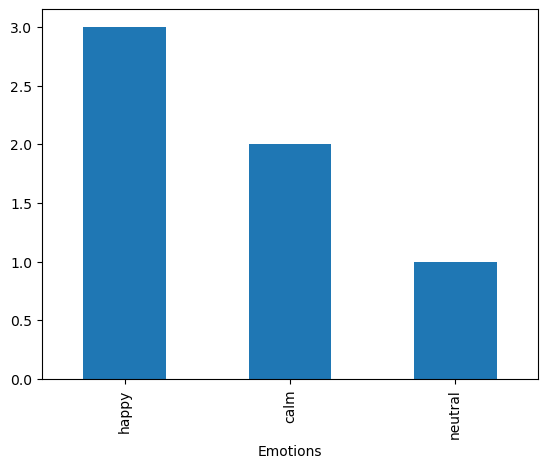

In [9]:
df = pd.DataFrame(testing_y, columns=['Emotions'])
df.Emotions.value_counts().plot(kind='bar')

##### After the feature extraction, let’s initialize the classifier to the training data

##### The Theory behind my approach:
Initialize the multi-layer perceptron (MLP) Classifier from scikit-learn. This is an algorithm to optimize the log loss using stochastic gradient descent. This method accepts the following parameters:
* alpha: This defines the penalty to the loss function. This uses the L2 regularization.
* batch_size: This defines the size of mini-batches in the stochastic optimizer.
* hidden_layer_sizes: This defines the number of neurons in the hidden layers.
* learning_rate: This defines the rate of learning of the algorithm. This is defined as a string value. adaptive value makes the algorithm adapt to the learning.
* max_iter: This defines the number of iterations to apply to the training data. With each iteration, it checks the prediction and updates itself.

In [10]:
model=MLPClassifier(alpha=0.1, batch_size=256, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

##### After initializing the classifier, use the classifier to get the prediction on the training data of datasets. After the classification, get the predictions from the model.

In [11]:
model.fit(training_x, training_y)

/Users/stevearmstrong/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


MLPClassifier(alpha=0.1, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [12]:
predictions = model.predict(testing_x)
print(predictions)

['calm' 'happy' 'happy' 'neutral' 'calm' 'happy']


##### After getting the predictions from the classifier, we compare them with the true values.

In [13]:
for i in range(len(testing_y)):
    print(testing_y[i], " - ", predictions[i])
score = accuracy_score(y_true=testing_y, y_pred=predictions)
print("Accuracy: ", score*100, "%")

calm  -  calm
happy  -  happy
happy  -  happy
neutral  -  neutral
calm  -  calm
happy  -  happy
Accuracy:  100.0 %


##### Plot the loss curve using the model after completing the model and getting all the predictions.

##### Theory behind my Approach:

A loss curve during training is one of the most commonly used plots for debugging a neural network. It provides a snapshot of the training process and the learning trajectory of the network.

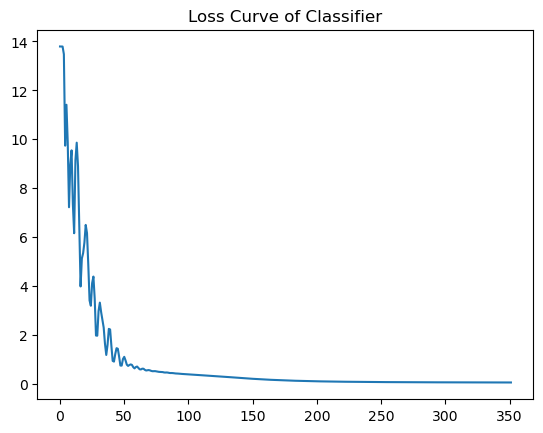

In [14]:
loss = model.loss_curve_
plt.title("Loss Curve of Classifier")
plt.plot(loss)